In [2]:
import os
import pandas as pd
import seaborn as sns
import itertools

## Fig 1. Question Types

In [3]:
question_dir = "../../test_queries/subsets/"
question_files = os.listdir(question_dir)
question_files

['allele_def_subset.txt',
 'recommendation_category_for_pheno_subset.txt',
 'allele_function_subset.txt',
 'drug_guidelines_for_pheno_subset.txt',
 'diplotype_to_phenotype_subset.txt',
 'allele_freq_subset.txt',
 'drug_to_genes_subset.txt',
 'gene_to_drugs_subset.txt']

In [4]:
question_counts = {}
for question_path in question_files:
    question_class = " ".join(question_path.split("_")[:-1])
    question_counts[question_class] = len(open(question_dir+question_path, "r").readlines()) - 1

question_counts

{'allele def': 84,
 'recommendation category for pheno': 520,
 'allele function': 153,
 'drug guidelines for pheno': 411,
 'diplotype to phenotype': 191,
 'allele freq': 544,
 'drug to genes': 158,
 'gene to drugs': 22}

## Fig 2. Bar chart of scores by LLM and task

In [5]:
# dfs is a dictionary in the form of {llm_name: results_df, ...}, metric_names is a list of scoring metrics to be plotted
def barplot_metrics(dfs, metric_names): 
    metric_dfs = [dfs[llm_name][metric_names] for llm_name in sorted(dfs.keys())]
    combined = pd.concat(metric_dfs, keys=sorted(dfs.keys()))
    combined = combined.reset_index().melt(id_vars=["level_0"], value_vars=metric_names)
    combined.columns = ["LLM", "Metric", "Value"]
    return sns.catplot(combined, kind="bar", x="Metric", y="Value", hue="LLM")

### Allele Definition

gpt-4-turbo
Mean precision: 0.251984126984127
Mean recall: 0.2170986667759473
gpt-3.5-turbo
Mean precision: 0.17162698412698413
Mean recall: 0.16253517471245527


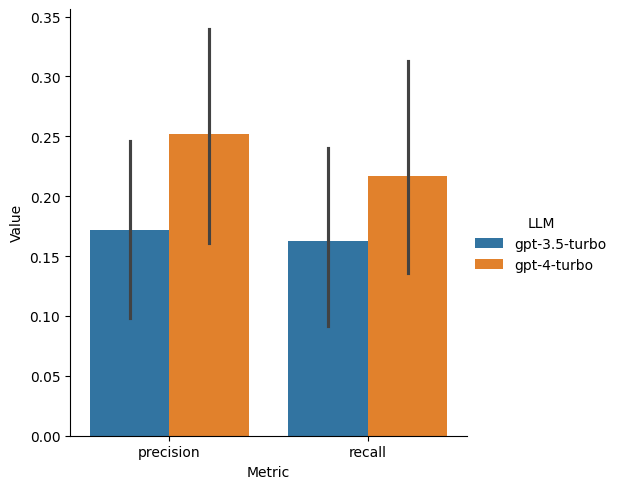

In [8]:
allele_def_gpt4 = pd.read_csv("../../results/AlleleDefinition_gpt-4-turbo_results.txt", sep="\t", header=0)
allele_def_gpt3_5 = pd.read_csv("../../results/AlleleDefinition_gpt-3.5-turbo_results.txt", sep="\t", header=0)
print("gpt-4-turbo")
print(f"Mean precision: {allele_def_gpt4['precision'].mean()}")
print(f"Mean recall: {allele_def_gpt4['recall'].mean()}")

print("gpt-3.5-turbo")
print(f"Mean precision: {allele_def_gpt3_5['precision'].mean()}")
print(f"Mean recall: {allele_def_gpt3_5['recall'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4-turbo": allele_def_gpt4, 
        "gpt-3.5-turbo": allele_def_gpt3_5
    }, 
    metric_names=["precision", "recall"]
)

### Allele Frequency

gpt-4-turbo
Mean absolute deviation: 0.06147775735294118
gpt-3.5-turbo
Mean absolute deviation: 0.1047645220588235


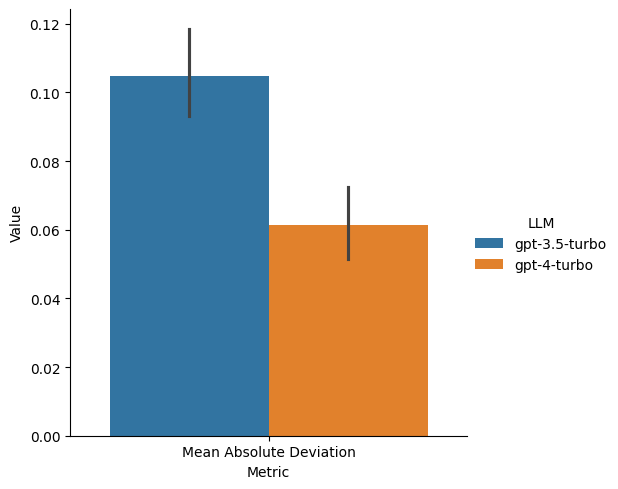

In [9]:
allele_freq_gpt4 = pd.read_csv("../../results/AlleleFrequency_gpt-4-turbo_results.txt", sep="\t", header=0)
allele_freq_gpt3_5 = pd.read_csv("../../results/AlleleFrequency_gpt-3.5-turbo_results.txt", sep="\t", header=0)
print("gpt-4-turbo")
print(f"Mean absolute deviation: {allele_freq_gpt4['score'].mean()}")

print("gpt-3.5-turbo")
print(f"Mean absolute deviation: {allele_freq_gpt3_5['score'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4-turbo": allele_freq_gpt4, 
        "gpt-3.5-turbo": allele_freq_gpt3_5
    }, 
    metric_names=["score"]
).set_xticklabels(["Mean Absolute Deviation"])

### Allele Function

gpt-4-turbo
Accuracy: 0.46405228758169936
gpt-3.5-turbo
Accuracy: 0.29411764705882354


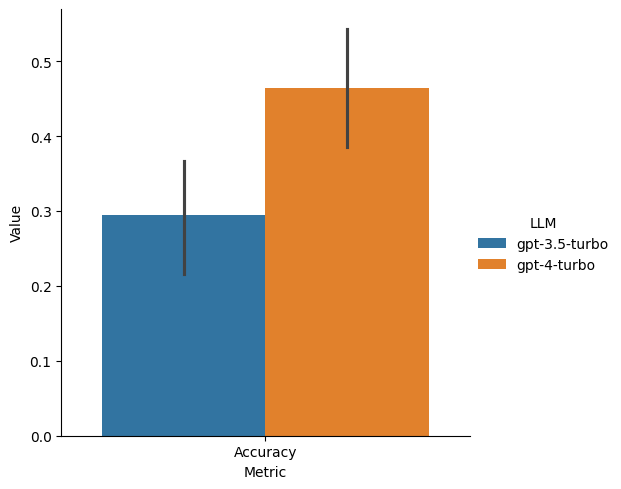

In [10]:
allele_func_gpt4 = pd.read_csv("../../results/AlleleFunction_gpt-4-turbo_results.txt", sep="\t", header=0)
allele_func_gpt3_5 = pd.read_csv("../../results/AlleleFunction_gpt-3.5-turbo_results.txt", sep="\t", header=0)
print("gpt-4-turbo")
print(f"Accuracy: {allele_func_gpt4['score'].mean()}")

print("gpt-3.5-turbo")
print(f"Accuracy: {allele_func_gpt3_5['score'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4-turbo": allele_func_gpt4, 
        "gpt-3.5-turbo": allele_func_gpt3_5
    }, 
    metric_names=["score"]
).set_xticklabels(["Accuracy"])

### Diplotype to Phenotype

gpt-4-turbo
Accuracy: 0.418848167539267
gpt-3.5-turbo
Accuracy: 0.3298429319371728


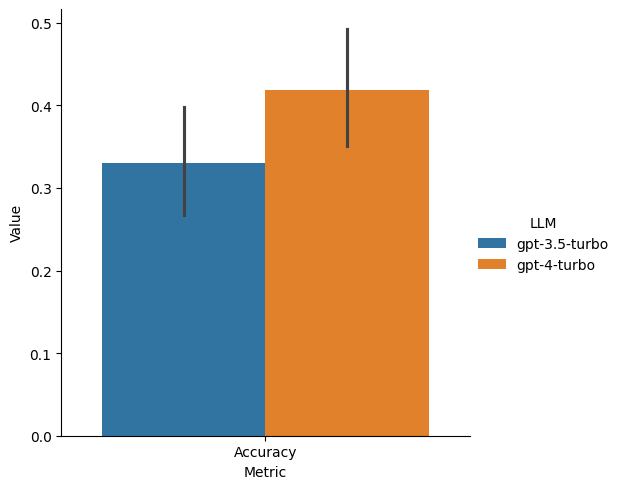

In [11]:
diplotype_gpt4 = pd.read_csv("../../results/DiplotypeToPhenotype_gpt-4-turbo_results.txt", sep="\t", header=0)
diplotype_gpt3_5 = pd.read_csv("../../results/DiplotypeToPhenotype_gpt-3.5-turbo_results.txt", sep="\t", header=0)
print("gpt-4-turbo")
print(f"Accuracy: {diplotype_gpt4['score'].mean()}")

print("gpt-3.5-turbo")
print(f"Accuracy: {diplotype_gpt3_5['score'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4-turbo": diplotype_gpt4, 
        "gpt-3.5-turbo": diplotype_gpt3_5
    }, 
    metric_names=["score"]
).set_xticklabels(["Accuracy"])

### Drug to Genes

gpt-4o
Mean precision: 0.49162457912457913
Mean recall: 0.6578282828282829
gpt-4-turbo
Mean precision: 0.3824555074555075
Mean recall: 0.5896464646464646
gpt-3.5-turbo
Mean precision: 0.20620623640899932
Mean recall: 0.6376262626262627


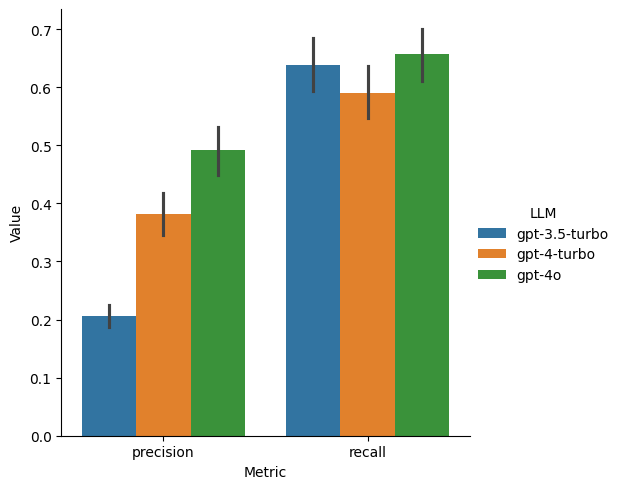

In [12]:
d2g_def_gpt4o = pd.read_csv("../../results/DrugToGenes_gpt-4o_results.txt", sep="\t", header=0)
d2g_def_gpt4 = pd.read_csv("../../results/DrugToGenes_gpt-4-turbo_results.txt", sep="\t", header=0)
d2g_def_gpt3_5 = pd.read_csv("../../results/DrugToGenes_gpt-3.5-turbo_results.txt", sep="\t", header=0)

print("gpt-4o")
print(f"Mean precision: {d2g_def_gpt4o['precision'].mean()}")
print(f"Mean recall: {d2g_def_gpt4o['recall'].mean()}")

print("gpt-4-turbo")
print(f"Mean precision: {d2g_def_gpt4['precision'].mean()}")
print(f"Mean recall: {d2g_def_gpt4['recall'].mean()}")

print("gpt-3.5-turbo")
print(f"Mean precision: {d2g_def_gpt3_5['precision'].mean()}")
print(f"Mean recall: {d2g_def_gpt3_5['recall'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4o": d2g_def_gpt4o,
        "gpt-4-turbo": d2g_def_gpt4, 
        "gpt-3.5-turbo": d2g_def_gpt3_5
    }, 
    metric_names=["precision", "recall"]
)

### Gene to Drugs

gpt-4o
Mean precision: 0.7226190476190476
Mean recall: 0.5210226516004548
gpt-4-turbo
Mean precision: 0.6194444444444445
Mean recall: 0.5360518184459832
gpt-3.5-turbo
Mean precision: 0.517063492063492
Mean recall: 0.4384772042094696
gemini-pro
Mean precision: 0.1075036075036075
Mean recall: 0.1616161616161616


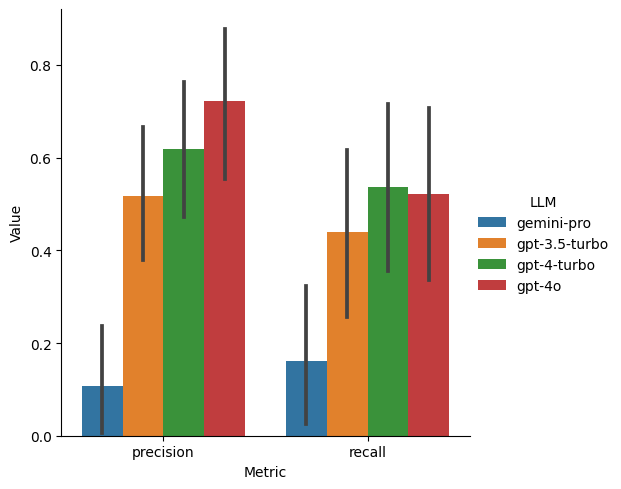

In [6]:
g2d_def_gpt4o = pd.read_csv("../../results/GeneToDrugs_gpt-4o_results.txt", sep="\t", header=0)
g2d_def_gpt4 = pd.read_csv("../../results/GeneToDrugs_gpt-4-turbo_results.txt", sep="\t", header=0)
g2d_def_gpt3_5 = pd.read_csv("../../results/GeneToDrugs_gpt-3.5-turbo_results.txt", sep="\t", header=0)
g2d_def_gemini_pro = pd.read_csv("../../results/GeneToDrugs_gemini-pro_results.txt", sep="\t", header=0)

print("gpt-4o")
print(f"Mean precision: {g2d_def_gpt4o['precision'].mean()}")
print(f"Mean recall: {g2d_def_gpt4o['recall'].mean()}")


print("gpt-4-turbo")
print(f"Mean precision: {g2d_def_gpt4['precision'].mean()}")
print(f"Mean recall: {g2d_def_gpt4['recall'].mean()}")

print("gpt-3.5-turbo")
print(f"Mean precision: {g2d_def_gpt3_5['precision'].mean()}")
print(f"Mean recall: {g2d_def_gpt3_5['recall'].mean()}")

print("gemini-pro")
print(f"Mean precision: {g2d_def_gemini_pro['precision'].mean()}")
print(f"Mean recall: {g2d_def_gemini_pro['recall'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4o": g2d_def_gpt4o,
        "gpt-4-turbo": g2d_def_gpt4, 
        "gpt-3.5-turbo": g2d_def_gpt3_5,
        "gemini-pro": g2d_def_gemini_pro
    }, 
    metric_names=["precision", "recall"]
)

### Phenotype to Guideline (Short Answer)

In [ ]:
pheno2guide_gpt4o = pd.read_csv("../../results/PhenoToGuideline_gpt-4o_results.txt", sep="\t", header=0)
pheno2guide_gpt4 = pd.read_csv("../../results/PhenoToGuideline_gpt-4-turbo_results.txt", sep="\t", header=0)
pheno2guide_gpt3_5 = pd.read_csv("../../results/PhenoToGuideline_gpt-3.5-turbo_results.txt", sep="\t", header=0)

embedding_funcs = [ # embedding functions from text_embeddings.py
            'oai_embedding',
            'negation_mpnet',
            'base_mpnet',
            'roberta',
            'gte',
        ]
metrics = [[f"{func_name}_ref_vs_llm", f"{func_name}_ref_vs_concurring", f"{func_name}_adversarial_vs_llm", f"{func_name}_concurring_vs_llm"] for func_name in embedding_funcs]
metrics = itertools.chain(metrics)

barplot_metrics(
    dfs={
        "gpt-4o": g2d_def_gpt4o,
        "gpt-4-turbo": g2d_def_gpt4, 
        "gpt-3.5-turbo": g2d_def_gpt3_5
    }, 
    metric_names=metrics
)

### Phenotype to Guideline Category

gpt-4-turbo
Accuracy: 0.425
gpt-3.5-turbo
Accuracy: 0.29615384615384616


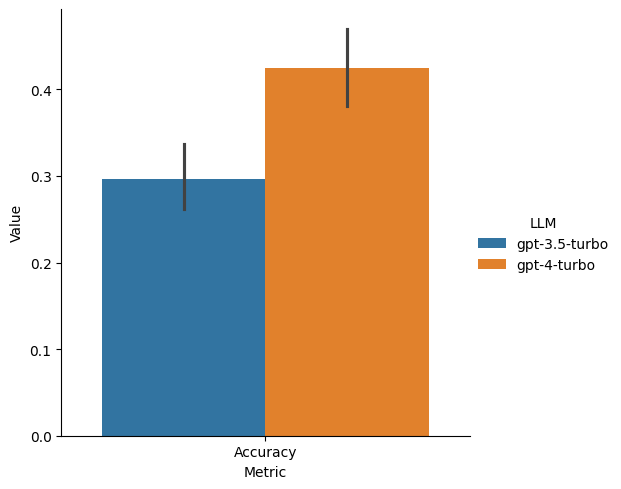

In [14]:
pheno2cat_gpt4 = pd.read_csv("../../results/RecToCategory_gpt-4-turbo_results.txt", sep="\t", header=0)
pheno2cat_gpt3_5 = pd.read_csv("../../results/RecToCategory_gpt-3.5-turbo_results.txt", sep="\t", header=0)
print("gpt-4-turbo")
print(f"Accuracy: {pheno2cat_gpt4['score'].mean()}")

print("gpt-3.5-turbo")
print(f"Accuracy: {pheno2cat_gpt3_5['score'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4-turbo": pheno2cat_gpt4, 
        "gpt-3.5-turbo": pheno2cat_gpt3_5
    }, 
    metric_names=["score"]
).set_xticklabels(["Accuracy"])

### Adversarial

## Table 1. LLM performance by question category

## Table 2. Representative Examples